# Feature selection using Boruta-SHAP

Feature selection (taken from [Wikipedia](https://en.wikipedia.org/wiki/Feature_selection)):

> *In machine learning and statistics feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:*
> *  *simplification of models to make them easier to interpret*
> *  *shorter training times,*
> *  *to avoid the curse of dimensionality,*
> *  *enhanced generalization by reducing overfitting (reduction of variance)* 

        
The BorutaShap package, as the name suggests, combines the [Boruta feature selection algorithm](https://www.jstatsoft.org/article/view/v036i11) with the [SHAP (SHapley Additive exPlanations) technique](https://christophm.github.io/interpretable-ml-book/shap.html). The BorutaShap package was written by Eoghan Keany, who has also written an introductory article ["Is this the Best Feature Selection Algorithm 'BorutaShap'?"](https://medium.com/analytics-vidhya/is-this-the-best-feature-selection-algorithm-borutashap-8bc238aa1677) providing an overview of how BorutaShap works.

This is a simple example script to perform Boruta-SHAP on the kaggle [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition data. 

First we shall install [BorutaShap](https://github.com/Ekeany/Boruta-Shap):

In [1]:
!pip install BorutaShap

     |████████████████████████████████| 264 kB 5.7 MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp37-cp37m-linux_x86_64.whl size=388171 sha256=17af03640aace3fee4033a8fb8e0a9675226f8c7bc269725b75318cbe87e7af5
  Stored in directory: /root/.cache/pip/wheels/05/86/23/2c22a86fb2ba700382f20e1dbe536e211b3b1578aecc8adfac
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.35.0
    Uninstalling shap-0.35.0:
      Successfully uninstalled shap-0.35.0


Now load in the kaggle House Prices data:

In [2]:
import pandas  as pd

#===========================================================================
# read in the House Prices data
#===========================================================================
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#===========================================================================
# select some features. These are all 'integer' fields for today.
#===========================================================================
features = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
        'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 
        'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

#===========================================================================
#===========================================================================
X_train       = train_data[features]
y_train       = train_data["SalePrice"]

Now for the `BorutaShap`

In [3]:
from BorutaShap import BorutaShap

# no model selected default is Random Forest, if classification is True it is a Classification problem
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=50, random_state=0)

100%|██████████| 50/50 [14:49<00:00, 17.78s/it]

17 attributes confirmed important: ['GarageArea', 'BsmtFinSF1', 'GrLivArea', 'LotArea', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'MSSubClass', 'OpenPorchSF', 'YearRemodAdd', 'YearBuilt', 'TotalBsmtSF', 'Fireplaces', 'OverallCond', 'OverallQual', '1stFlrSF', 'GarageCars']
14 attributes confirmed unimportant: ['BsmtFinSF2', 'BsmtFullBath', 'LowQualFinSF', 'BedroomAbvGr', 'YrSold', 'KitchenAbvGr', 'HalfBath', 'BsmtHalfBath', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
2 tentative attributes remains: ['TotRmsAbvGrd', 'FullBath']


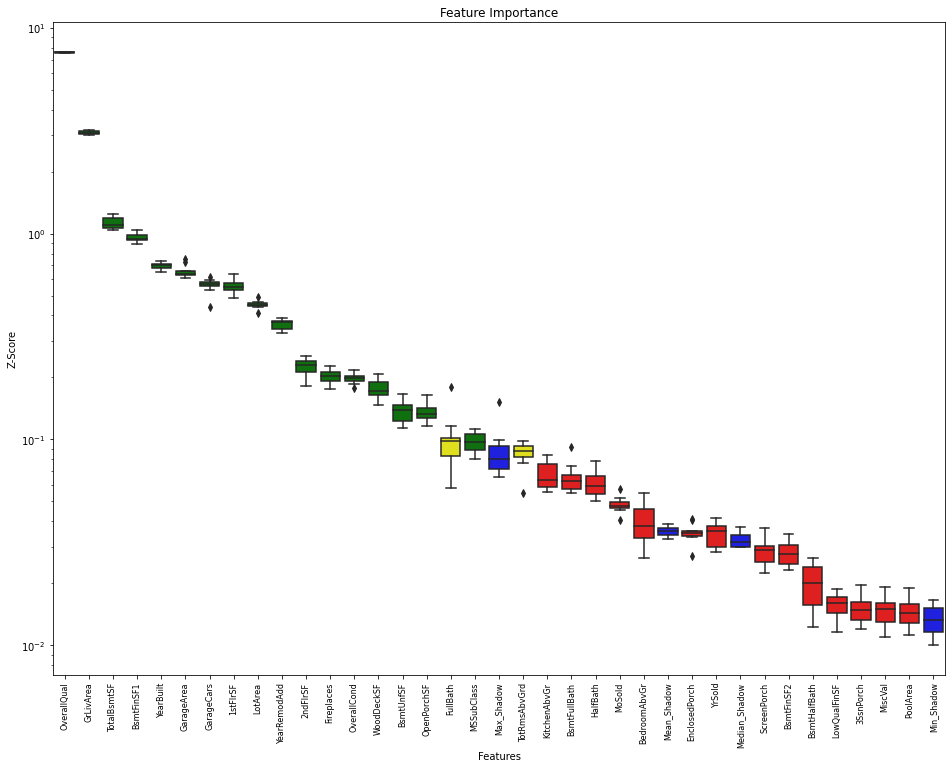

In [4]:
# Return Boxplot of features
Feature_Selector.plot(which_features='all', figsize=(16,12))

In [5]:
# Return a subset of the original data with the selected features
Feature_Selector.Subset()

,GarageArea,BsmtFinSF1,GrLivArea,LotArea,BsmtUnfSF,2ndFlrSF,WoodDeckSF,MSSubClass,OpenPorchSF,YearRemodAdd,YearBuilt,TotalBsmtSF,Fireplaces,OverallCond,OverallQual,1stFlrSF,GarageCars
0,548,706,1710,8450,150,854,0,60,61,2003,2003,856,0,5,7,856,2
1,460,978,1262,9600,284,0,298,20,0,1976,1976,1262,1,8,6,1262,2
2,608,486,1786,11250,434,866,0,60,42,2002,2001,920,1,5,7,920,2
3,642,216,1717,9550,540,756,0,70,35,1970,1915,756,1,5,7,961,3
4,836,655,2198,14260,490,1053,192,60,84,2000,2000,1145,1,5,8,1145,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,0,1647,7917,953,694,0,60,40,2000,1999,953,1,5,6,953,2
1456,500,790,2073,13175,589,0,349,20,0,1988,1978,1542,2,6,6,2073,2
1457,252,275,2340,9042,877,1152,0,70,60,2006,1941,1152,2,9,7,1188,1
1458,240,49,1078,9717,0,0,366,20,0,1996,1950,1078,0,6,5,1078,1


These results compare well with those obtained both via [recursive feature elimination (RFE)](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example) and via [permutation importance](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example), both applied to the very same dataset.
### Links:
* [Boruta-Shap](https://github.com/Ekeany/Boruta-Shap) (GitHub)
* [SHAP (SHapley Additive exPlanations)](https://github.com/slundberg/shap) by Scott Lundberg (GitHub)
* [Christoph Molnar "SHAP (SHapley Additive exPlanations)" in "Interpretable Machine Learning: A Guide for Making Black Box Models Explainable"](https://christophm.github.io/interpretable-ml-book/shap.html)
* Miron B. Kursa, Witold R. Rudnicki "Feature Selection with the Boruta Package", Journal of Statistical Software Volume 36, Issue 11 (2010) [doi: 10.18637/jss.v036.i11](https://www.jstatsoft.org/article/view/v036i11) ([pdf](https://www.jstatsoft.org/article/view/v036i11/v36i11.pdf))

**Related notebooks:**

* [Automated feature selection with boruta](https://www.kaggle.com/residentmario/automated-feature-selection-with-boruta) by [Aleksey Bilogur](https://www.kaggle.com/residentmario)
* [Boruta Beats 'em all-New look at Feature Selection](https://www.kaggle.com/ajaysamp/boruta-beats-em-all-new-look-at-feature-selection) by [Ajay Sampath](https://www.kaggle.com/ajaysamp)
* [SHAP Values](https://www.kaggle.com/dansbecker/shap-values) by [DanB](https://www.kaggle.com/dansbecker)
* [Advanced Uses of SHAP values](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) by [DanB](https://www.kaggle.com/dansbecker)